<h2>Álgebra Linear e Numpy</h2>

In [1]:
import numpy as np

In [2]:
matrix1 = np.array([[1, 2, 3], [3, 4, 5], [1, 5, 6]])
matrix2 = np.array([[10, 20, 30], [70, 80, 90], [100, 110, 120]])
matrix3 = np.array([[10, 20, 30]]).T
print(np.shape(matrix1), np.shape(matrix2), np.shape(matrix3))

(3, 3) (3, 3) (3, 1)


Autovalores e Autovetores

In [3]:
np.linalg.eig(matrix1) # Autovetores

(array([11.04914663+0.j        , -0.02457332+0.73649475j,
        -0.02457332-0.73649475j]),
 array([[ 0.33423975+0.j        ,  0.00237542+0.39976169j,
          0.00237542-0.39976169j],
        [ 0.63575943+0.j        ,  0.70544826+0.j        ,
          0.70544826-0.j        ],
        [ 0.69576845+0.j        , -0.5692509 -0.13594523j,
         -0.5692509 +0.13594523j]]))

In [4]:
np.linalg.eigvals(matrix1) # Autovalores

array([11.04914663+0.j        , -0.02457332+0.73649475j,
       -0.02457332-0.73649475j])

Inversa, sistemas lineares e determinante

In [5]:
np.linalg.det(matrix1)

6.0

In [6]:
np.linalg.inv(matrix1)

array([[-0.16666667,  0.5       , -0.33333333],
       [-2.16666667,  0.5       ,  0.66666667],
       [ 1.83333333, -0.5       , -0.33333333]])

In [7]:
np.linalg.inv(matrix1).round(2)

array([[-0.17,  0.5 , -0.33],
       [-2.17,  0.5 ,  0.67],
       [ 1.83, -0.5 , -0.33]])

In [8]:
np.linalg.solve(matrix1, matrix3)

array([[-1.66666667],
       [ 8.33333333],
       [-1.66666667]])

Minimos Quadrados

In [9]:
Conc_subst = [1.00,3.70,1.00,9.00,2.00,2.25,2.91,2.75,3.00,3.50,3.75,
            9.45,4.25,7.00,4.75,5.00,5.50,6.00,6.50,7.00,7.50,8.00,8.25,9.40,9.43,8.94,9.20,9.50,8.00,9.00] # X
Ganho_peso = [9.40,11.40,12.00,16.00,11.00,12.50,10.40,11.50,12.50,
            14.00,14.50,17.00,13.25,14.80,14.00,14.10,12.50,15.20,
            14.20,16.50,17.00,14.50,16.00,17.00,14.90,15.00,19.00,17.50,16.00,17.50] # Y
tamanho = len(Ganho_peso)

In [10]:
A = np.vstack([Conc_subst, np.ones(tamanho)]).T
A[:6]

array([[1.  , 1.  ],
       [3.7 , 1.  ],
       [1.  , 1.  ],
       [9.  , 1.  ],
       [2.  , 1.  ],
       [2.25, 1.  ]])

In [25]:
b1, b0 = np.linalg.lstsq(A, Ganho_peso, rcond = None)[0]
x, ychapeu = np.array(Conc_subst), b1*np.array(Conc_subst) + b0
b0, b1, ychapeu

(10.039702965614607,
 0.7320391541235942,
 array([10.77174212, 12.74824784, 10.77174212, 16.62805535, 11.50378127,
        11.68679106, 12.1699369 , 12.05281064, 12.23582043, 12.60184001,
        12.78484979, 16.95747297, 13.15086937, 15.16397704, 13.51688895,
        13.69989874, 14.06591831, 14.43193789, 14.79795747, 15.16397704,
        15.52999662, 15.8960162 , 16.07902599, 16.92087101, 16.94283219,
        16.584133  , 16.77446318, 16.99407493, 15.8960162 , 16.62805535]))

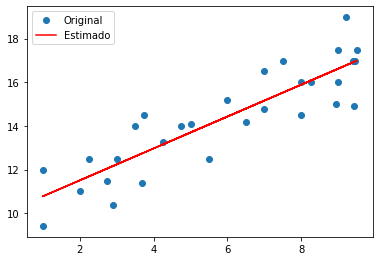

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
axes = fig.add_axes([.5, .1, .8, .8])
axes.plot(Conc_subst, Ganho_peso, 'o', label = 'Original')
axes.plot(x, ychapeu , 'r', label = 'Estimado')
axes.legend()

plt.show() 